In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import PrecisionRecallDisplay

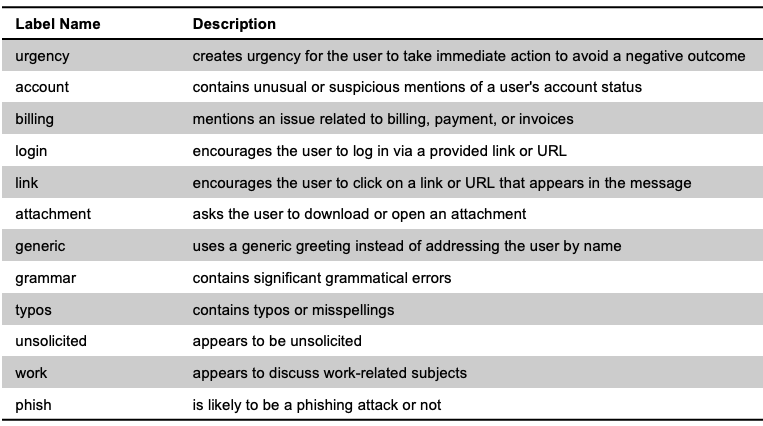

In [67]:
data = pd.read_csv("phish.csv")
data.head()

,Unnamed: 0,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
0,42,Please take a look at the attached and give me...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,"Rod,\nI wanted to forward this to you. Arthur...",0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45,\nI confirmed that since Enron does not deviat...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,46,Good afternoon.\n\nI wanted to forward you one...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,47,Kim:\n\nHere is a summary of the structure we ...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [68]:
data.describe()

,Unnamed: 0,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.00000,2897.000000,2897.000000,2897.000000,2897.00000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,1491.996203,0.528823,0.160511,0.340697,0.47601,0.100104,0.328616,0.449776,0.44805,0.371074,0.521574,0.363134,0.265447,0.629962
std,836.442750,0.499255,0.367143,0.474026,0.49951,0.300190,0.469791,0.497557,0.49738,0.483175,0.499621,0.480986,0.441647,0.482898
min,42.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,768.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1492.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2216.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2940.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
phish_copy = data[data["PHISH-GT"] == 1.0]
no_phish_copy = data[data["PHISH-GT"] == 0.0]

Phishing Row Sums
 7.0     283
8.0     259
6.0     232
9.0     207
5.0     152
10.0    128
4.0     102
3.0      72
2.0      35
1.0      27
11.0     21
0.0      13
12.0      1
Name: count, dtype: int64 

Not Phishing Row Sums
 1.0    523
2.0    404
3.0    236
4.0     82
0.0     77
5.0     33
6.0      8
7.0      2
Name: count, dtype: int64


(array([ 77., 523., 404., 236.,  82.,  33.,  10.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

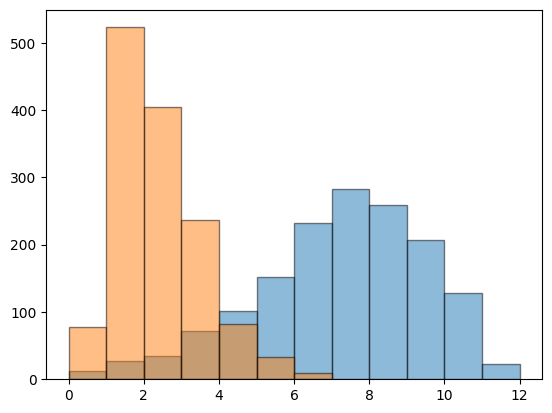

In [70]:
phish_row_sum = phish_copy.drop(columns=["PHISH-GT", "text", "Unnamed: 0"]).sum(axis=1)
no_phish_row_sum = no_phish_copy.drop(columns=["PHISH-GT", "text", "Unnamed: 0"]).sum(axis=1)
print("Phishing Row Sums\n", phish_row_sum.value_counts(), "\n")
print("Not Phishing Row Sums\n", no_phish_row_sum.value_counts())

plt.hist(phish_row_sum, edgecolor = 'k', bins = 12, alpha = 0.5)
plt.hist(no_phish_row_sum, edgecolor = 'k', bins = 7, alpha = 0.5)

urgency
1.0    1355
0.0     177
Name: count, dtype: int64


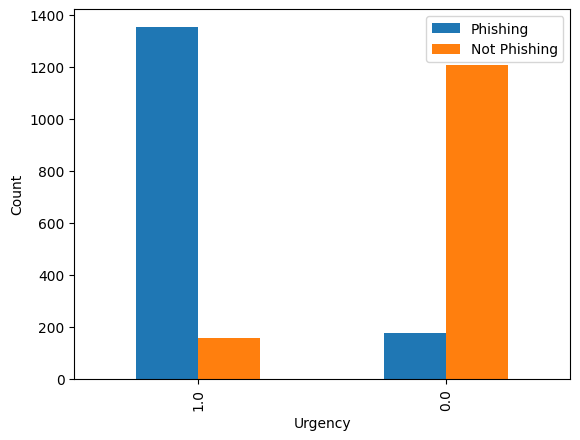

In [71]:
phish_urgency = phish_copy["urgency"].value_counts()

phish_no_urgency = no_phish_copy["urgency"].value_counts()
combined = pd.concat([phish_urgency, phish_no_urgency], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Urgency")
plt.ylabel("Count")
print(phish_urgency)

Text(0, 0.5, 'Count')

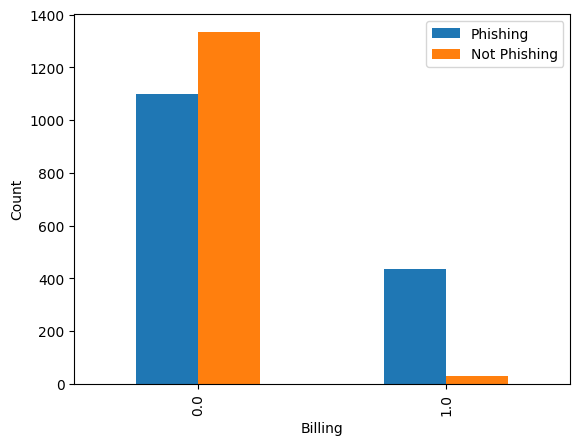

In [72]:
phish_billing = phish_copy["billing"].value_counts()

phish_no_billing = no_phish_copy["billing"].value_counts()

combined = pd.concat([phish_billing, phish_no_billing], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Billing")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

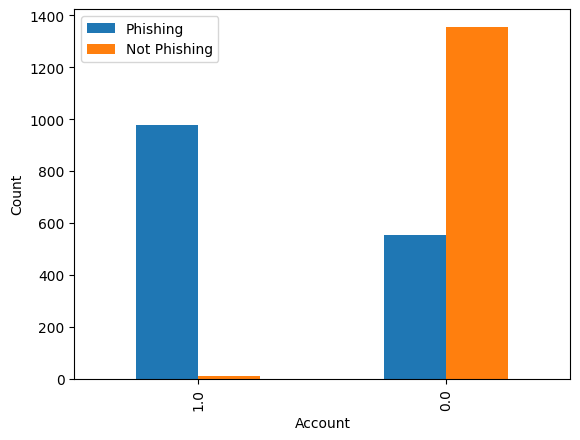

In [73]:
phish_account = phish_copy["account"].value_counts()

phish_no_account = no_phish_copy["account"].value_counts()

combined = pd.concat([phish_account, phish_no_account], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Account")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

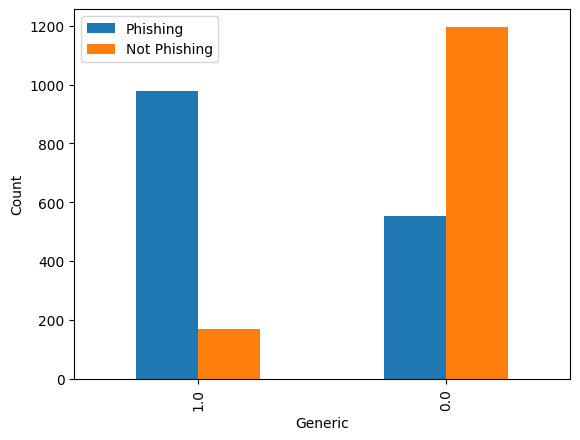

In [74]:
phish_generic = phish_copy["generic"].value_counts()

phish_no_generic = no_phish_copy["generic"].value_counts()

combined = pd.concat([phish_account, phish_no_generic], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Generic")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

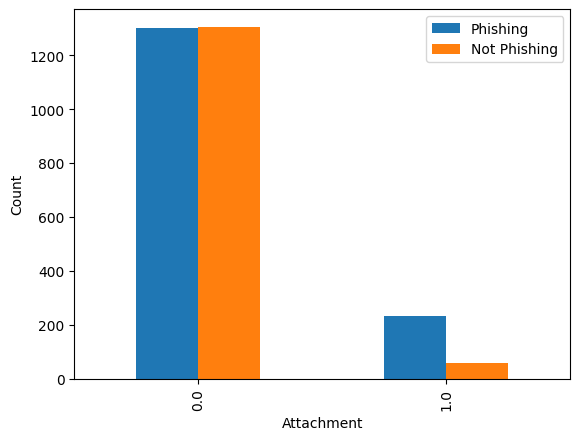

In [75]:
phish_attachment = phish_copy["attachment"].value_counts()

phish_no_attachment = no_phish_copy["attachment"].value_counts()

combined = pd.concat([phish_attachment, phish_no_attachment], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Attachment")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

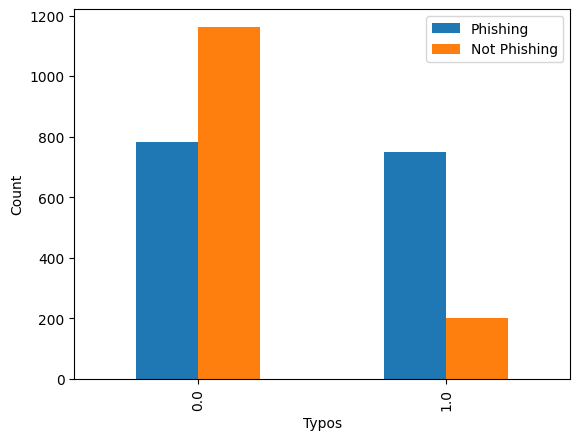

In [76]:
phish_typos = phish_copy["typos"].value_counts()

phish_no_typos = no_phish_copy["typos"].value_counts()

combined = pd.concat([phish_typos, phish_no_typos], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Typos")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

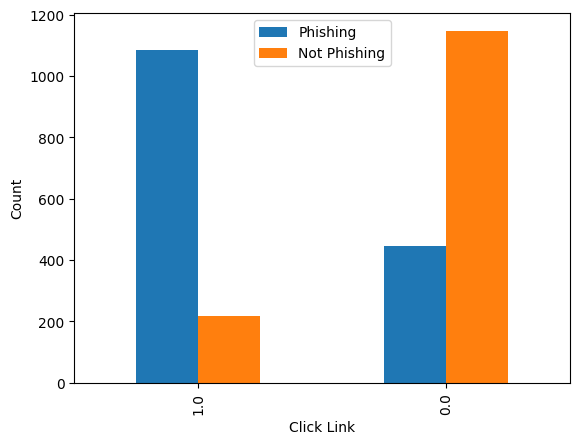

In [77]:
phish_clicklink = phish_copy["click-link"].value_counts()

phish_no_clicklink = no_phish_copy["click-link"].value_counts()

combined = pd.concat([phish_clicklink, phish_no_clicklink], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Click Link")
plt.ylabel("Count")

In [78]:
data.columns

Index(['Unnamed: 0', 'text', 'PHISH-GT', 'billing', 'account', 'generic',
       'attachment', 'typos', 'click-link', 'grammar', 'login', 'urgency',
       'phish', 'unsolicited', 'work'],
      dtype='object')

Text(0, 0.5, 'Count')

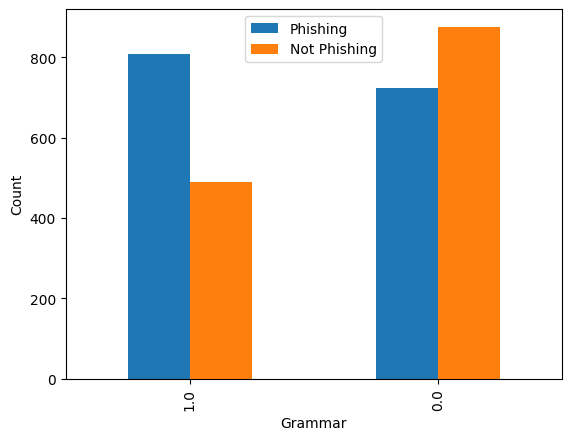

In [79]:
phish_grammar = phish_copy["grammar"].value_counts()

phish_no_grammar = no_phish_copy["grammar"].value_counts()

combined = pd.concat([phish_grammar, phish_no_grammar], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Grammar")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

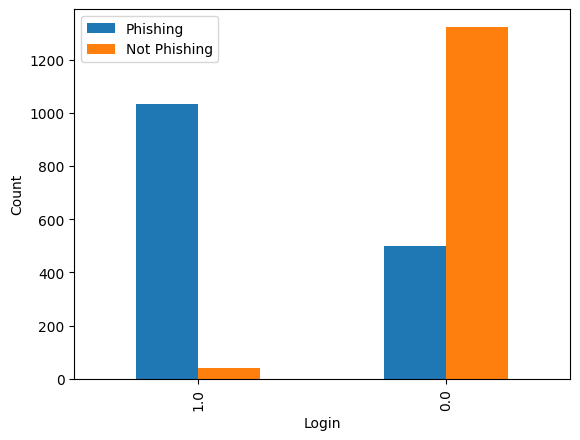

In [80]:
phish_login = phish_copy["login"].value_counts()

phish_no_login = no_phish_copy["login"].value_counts()

combined = pd.concat([phish_login, phish_no_login], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Login")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

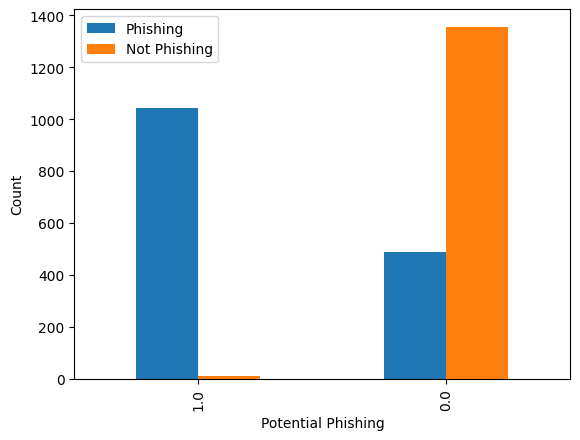

In [81]:
phish = phish_copy["phish"].value_counts()

phish_no = no_phish_copy["phish"].value_counts()

combined = pd.concat([phish, phish_no], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Potential Phishing")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

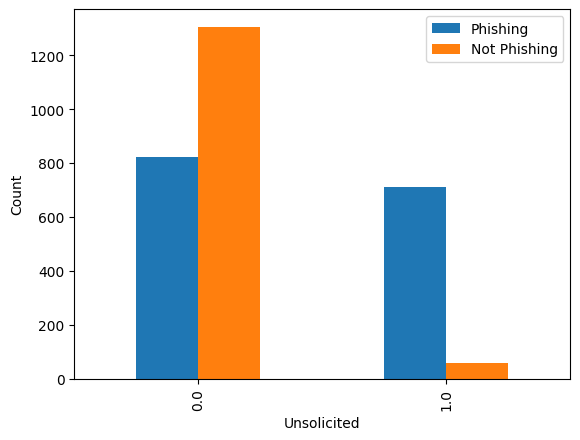

In [82]:
phish_unsolicited = phish_copy["unsolicited"].value_counts()

phish_no_unsolicited = no_phish_copy["unsolicited"].value_counts()

combined = pd.concat([phish_unsolicited, phish_no_unsolicited], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Unsolicited")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

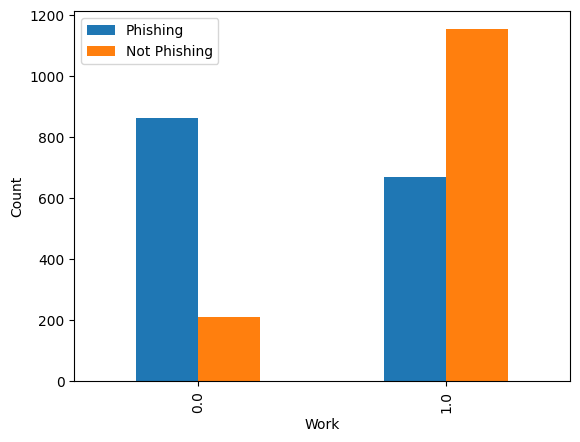

In [83]:
phish_work = phish_copy["work"].value_counts()

phish_no_work = no_phish_copy["work"].value_counts()

combined = pd.concat([phish_work, phish_no_work], axis = 1, keys = ["Phishing", "Not Phishing"])
combined.plot.bar()
plt.xlabel("Work")
plt.ylabel("Count")

In [84]:
# Anything to do with account information, money, and urgency tend to show phishing emails
# Phishing emails have a lot more of these binary features, so they sum to a higher value
# phishing alert has low false positive, could potentially use that

In [85]:
no_phish_copy["text"][1]

'Rod,\nI wanted to forward this to you.  Arthur Warga is the professor I spoke about that is an incredible Financial wiz.  He worked under Ron Singer but he is now the new Interim Dean.  This may be a great opportunity for you and Professor Warga to meet to discuss Finance curriculum which would help in Analyst recruiting.\n\nThanks,\nTracey Kozadinos\n713-853-3446\n\n\n\n \n\nGO COOGS!!!\n\nThe C.T. Bauer College of Business at the University of Houston main campus has just named Professor Arthur Warga as the new interim Dean.  What an excellent choice!  Anyone who knows Professor Warga or had the opportunity to be instructed by him knows he is a financial genius and is known nationally for his Fixed Income research and Fixed Income training program designed for the World Bank.  \n\nRead about Professor Warga and his plans for the CBA and new AIM Center here: \nhttp://www.uh.edu/campus/cougar/Todays/Issue/news/news1.html\n\nRead the background and credentials on Professor Warga here:\

In [86]:
phish_copy["text"][1365]

'Password will expire in 3 days. Click Here To Validate E-mail Password Thank you, IT-Service Help Desk Password will expire in 3 days. Click Here To Validate E-mail Password Thank you, IT-Service Help Desk'

In [87]:
phish_copy["text"][1454]

'Your account has been blacklisted   Your jose@monkey.org account was detected spam activities and will be fully blocked.    If no action is taking from your side we will be force to continue the process of blocking your account.   If you would like to continue using your e-mail account.        Re-activate now   NOTE: Failure to respond to this message, your account will be deactivated from the database.          To opt out or change where you receive security notifications,Click Here. Your account has been blacklisted  Your jose@monkey.org account was detected spam activities and will be fully blocked.  If no action is taking from your side we will be force to continue the process of blocking your account. If you would like to continue using your e-mail account. Re-activate now NOTE: Failure to respond to this message, your account will be deactivated from the database.  ¬†To opt out or change where you receive security notifications,Click Here.'

In [88]:
no_phish_copy["text"][6]

"Andy,\n\nPer our recent discussions, you will find a proposal from Enron Compression Services to provide HP Services to KNG Energy to meet it growth expectations (either as is or through a new joint venture/ownership structure from the current bidding process).  We have made this proposal to conform with the expansion scenarios outlined in the offering memorandum and have provided flexibility for a 60%-90% load factor to be utilized for both stations.  We would be happy to have a tele-conference to go through this proposal with you.  You will also note that the latter part of the presentation begins to outline additional options (on a notional value basis) that we can put into a deal to increase the value of the deal over the proposed 10-year term.\n\nWe took a look at the strategic value of the underlying assets that were offered and were unfortunately not able to come up with a structure that we could support for either the purchase or re-capitalization of KNG Energy's assets.  We a

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
copy_without_phish = data.drop(columns=["Unnamed: 0", "phish"])
train, test = train_test_split(copy_without_phish, test_size = 0.2)
train = train.reset_index(drop = True)
without_class = train.drop(columns=["text", "PHISH-GT"])

In [90]:
Y_model = train["PHISH-GT"]
test_model = test["PHISH-GT"]
predictor = DecisionTreeClassifier(max_depth= 3, max_leaf_nodes=6)
predictor.fit(without_class, Y_model)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [91]:
train_predictions = predictor.predict(without_class)
training_accuracy = predictor.score(without_class, Y_model)

test_predictions = predictor.predict(test.drop(columns=["PHISH-GT", "text"]))
test_accuracy = predictor.score(test.drop(columns=["PHISH-GT", "text"]), test_model)
training_accuracy, test_accuracy

(0.8929650410012948, 0.9051724137931034)

[Text(0.5555555555555556, 0.875, 'urgency <= 0.5\ngini = 0.498\nsamples = 2317\nvalue = [1087, 1230]'),
 Text(0.3333333333333333, 0.625, 'unsolicited <= 0.5\ngini = 0.225\nsamples = 1107\nvalue = [964, 143]'),
 Text(0.2222222222222222, 0.375, 'generic <= 0.5\ngini = 0.157\nsamples = 1012\nvalue = [925, 87]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.08\nsamples = 868\nvalue = [832, 36]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.457\nsamples = 144\nvalue = [93, 51]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.484\nsamples = 95\nvalue = [39.0, 56.0]'),
 Text(0.7777777777777778, 0.625, 'login <= 0.5\ngini = 0.183\nsamples = 1210\nvalue = [123, 1087]'),
 Text(0.6666666666666666, 0.375, 'account <= 0.5\ngini = 0.408\nsamples = 402\nvalue = [115.0, 287.0]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.5\nsamples = 219\nvalue = [110, 109]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.053\nsamples = 183\nvalue = [5, 178]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.02\nsamples = 808\nval

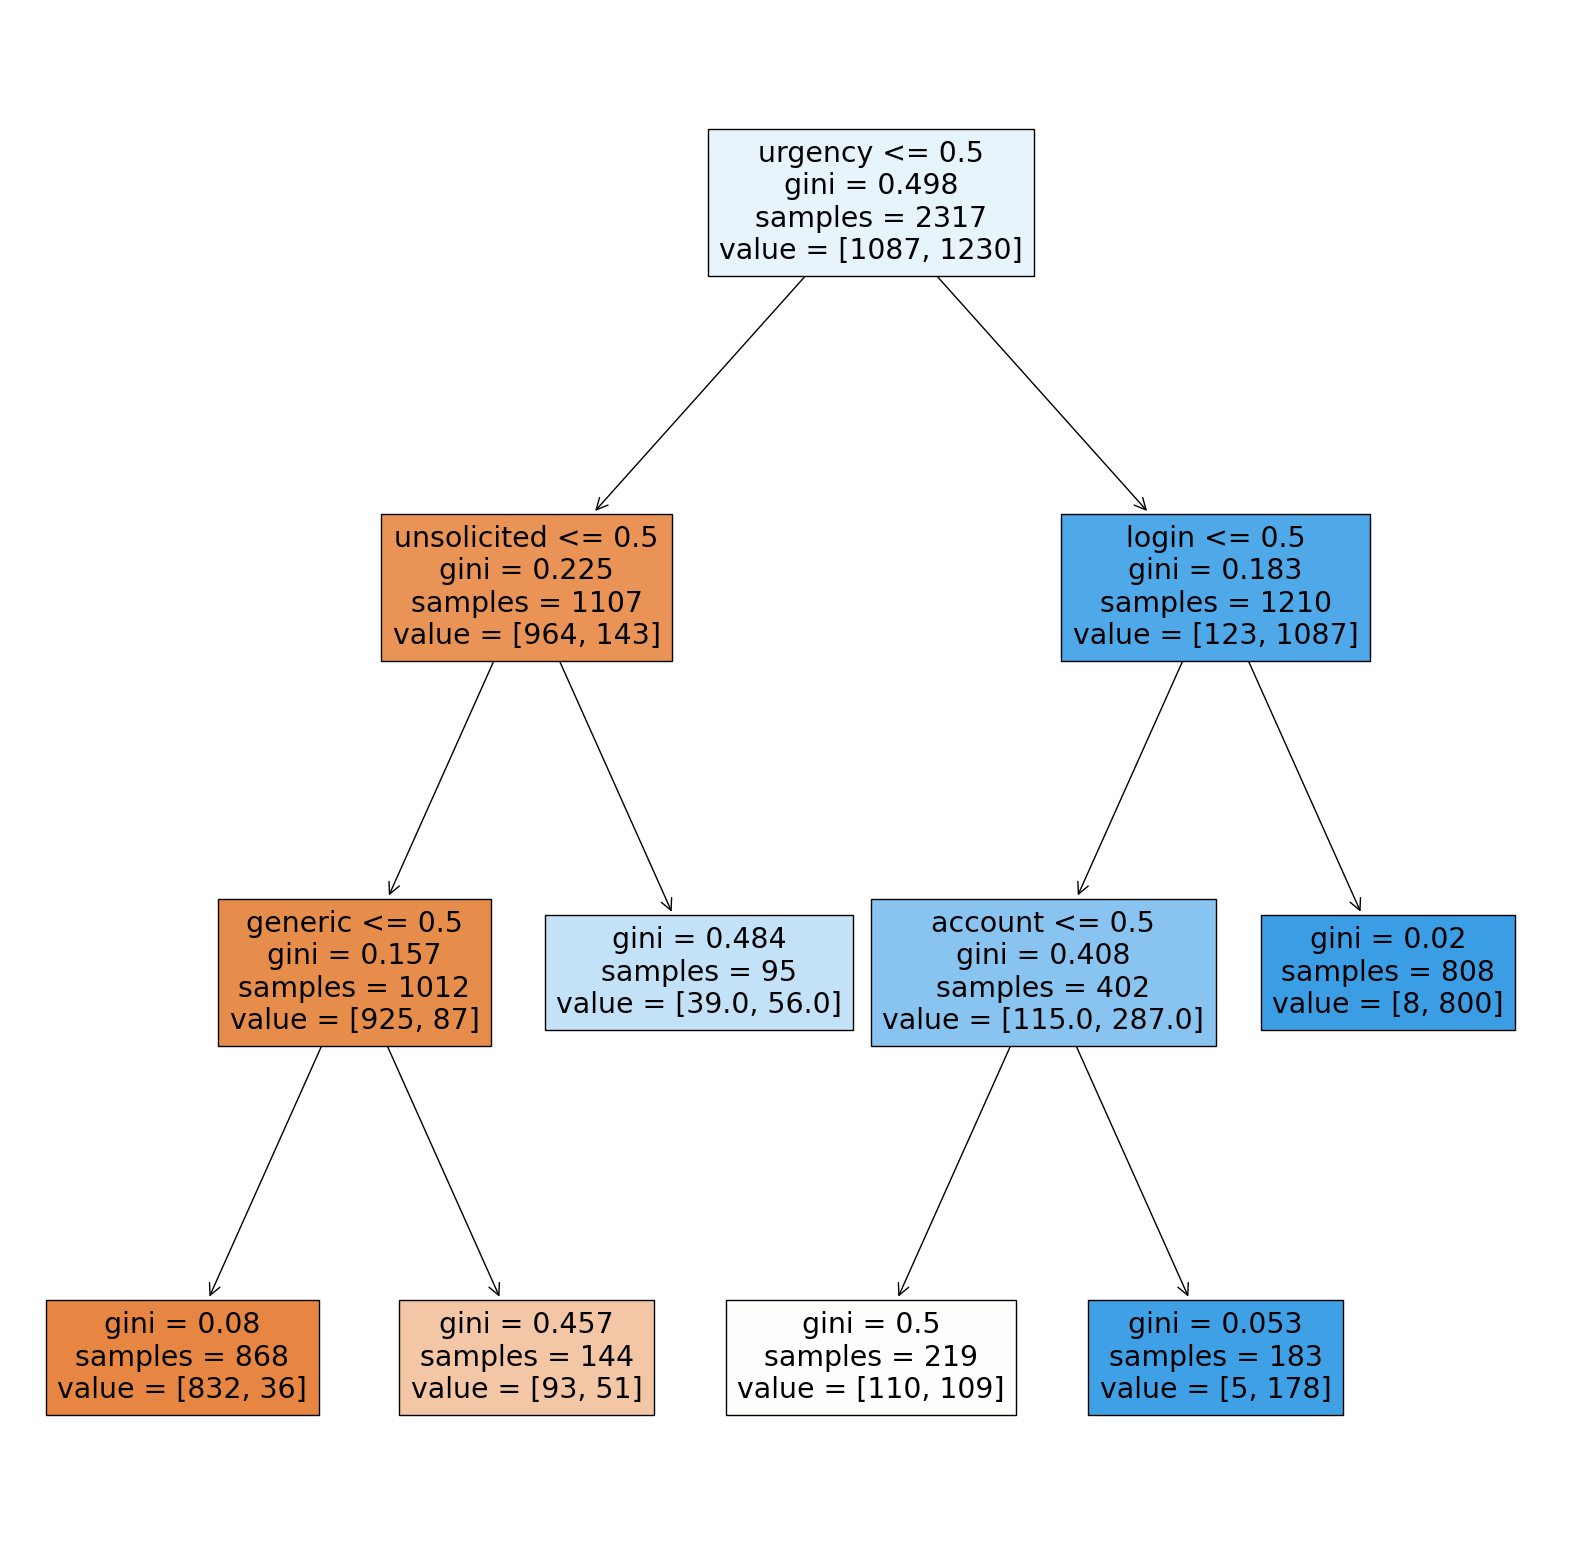

In [92]:
plt.figure(figsize=(20, 20))
skl.tree.plot_tree(predictor, feature_names = without_class.columns, filled = True)

In [93]:
# gini is metric used to evaluate classification models.
# Quantifies how messy or clean a dataset is.
# Goes from 0 (all data points in that group have same label) to 1 (messiest, data points are split evenly among all labels)

In [94]:
test_predictions_tree = predictor.predict(test.drop(columns=["text","PHISH-GT"]))
y_test = test["PHISH-GT"]
tree_matrix = skl.metrics.confusion_matrix(y_test, test_predictions_tree)
print(tree_matrix)

precision = skl.metrics.precision_score(y_test, test_predictions_tree)
recall = skl.metrics.recall_score(y_test, test_predictions_tree)

print("Accuracy:",skl.metrics.accuracy_score(y_test, test_predictions_tree))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, test_predictions_tree))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, test_predictions_tree))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[265  13]
 [ 42 260]]
Accuracy: 0.9051724137931034
Precision: 0.9523809523809523
Recall: 0.8609271523178808
F1 Score: 0.9043478260869565


[0.99009901 0.35416667 0.04147465 0.49771689 0.58947368 0.9726776 ]


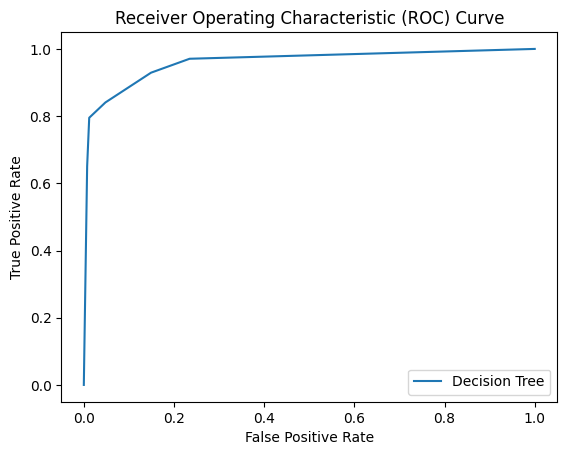

Decision Tree AUC: 0.9601038885273858


In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_prediction = predictor.predict_proba(without_class)[:, 1]
print(pd.Series(y_prediction).unique())
fpr, tpr, thresholds = roc_curve(Y_model, y_prediction)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(["Decision Tree"])
plt.show()

auc_roc_log = roc_auc_score(Y_model, y_prediction)
print("Decision Tree AUC:", auc_roc_log)

In [96]:
first_box = train[(train["urgency"] == 0) & (train["unsolicited"] == 0) & (train["attachment"] == 0)].reset_index()
first_box

,index,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work
0,2,Gordon Rutter\ngordon@rutter.freeserve.co.uk\n...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9,"hey puddin head, congratulations! glad to hea...",0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12,"Hi,\n\nthe shellscript part was a different at...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,13,"On Sun, Oct 06, 2002 at 11:10:05PM +0100, Decl...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17,"Dear Sirs, could you please answer the followi...",0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,2310,"The licences keep changing, some have in the p...",0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
948,2311,STCA buys 50 MW @ sp for $61.44 deal number 68...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
949,2312,"Netflix,\nInc. \n\nStock Quote Notification\n...",0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,2314,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [97]:
second_box = train[(train["urgency"] == 0) & (train["unsolicited"] == 0) & (train["attachment"] == 1) & (train["PHISH-GT"] == 1)].reset_index()
second_box

,index,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work
0,1,"Dear, To improve service and convenience for u...",1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,57,\n\nBarclay Bank Plc London have approve your ...,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,285,"Dear jose,¬†We are planning to purchase the fo...",1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,433,"Good day, Please find proof of payment atta...",1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,456,"Hi, I have been trying to send you some docs ...",1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5,510,"Absa Bank Limited, Registration number 1986/00...",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,516,"Hello\n\nhow are you today,\n\nPlease find att...",1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,525,New Voice Message New Caller left a message(...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,539,PERSONAL DOCUMENT ATTACHED,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,567,Hello\n\nKindly find attached for payment conf...,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
third_box = train[(train["urgency"] == 0) & (train["unsolicited"] == 1) & (train["PHISH-GT"] == 1)].reset_index()
third_box


,index,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work
0,80,- This mail is in HTML. Some elements may be o...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,105,Notice of payment Please find enclosed copy to...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,167,jose@monkey.org 02¬†message(s) in spam quarant...,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,197,Untitled Document ‰Ω†Â•ΩÁî®Êà∑Ôºöjose Á°ÆËÆ§...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,280,_____PayPaI_____ _____________________________...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,356,"Dear jose,FYI,¬†Please see¬†attachedThursday,¬...",1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,377,"Hi there, You have been sent some documents, ...",1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
7,400,"Hello¬†jose@monkey.org,You have one shared doc...",1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,415,"jose@monkey.org, `A8v84¬êAE{B1¬ë4D¬ò9D]F2nE1...",1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,434,Spam Quarantine Notification Spam Q...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [99]:
fourth_box = train[(train["urgency"] == 1) & (train["generic"] == 0) & (train["login"] == 0) & (train["PHISH-GT"] == 1)].reset_index()
fourth_box

,index,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work
0,5,Maryden Cruz (mcruzltgc@aol.com) just used Dro...,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,18,"Hello jose@monkey.org , We are restrictin...",1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,53,Your messages couldn't be delivered Your recen...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,67,"Dear customer, ¬† ¬† Please note that, your mo...",1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,202,jose@monkey.org Messages could not be delivere...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,206,"Dear jose@monkey.org, ¬†Your email quota as re...",1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6,237,"Hi jose@monkey.org,\n\nOur success has always ...",1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7,322,Messsage Authorized Access Message length: 53 ...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,325,We received your request to deactivate your¬†a...,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
9,368,Recipient: jose@monkey.orgThis message is from...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
predictor.feature_importances_

array([0.        , 0.05366499, 0.02881654, 0.        , 0.        ,
       0.        , 0.        , 0.04885481, 0.81612596, 0.05253771,
       0.        ])

In [101]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in
    
    Returns:
        A 2D NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

In [102]:
data[(data["urgency"] == 1) & (data["PHISH-GT"] == 1) ].reset_index().loc[6]["text"]

'Your two (2) outgoing mails have been placed on hold due to the recent upgrade in our database. ¬† You are required to immediately validate and re-set your Email account space on our database: ¬† ¬† ¬† ¬† ¬† Kindly click¬†Only Here¬†to  update your Outlook ¬†Email Account. ¬† ¬† ¬†¬† We apologize for any inconvenience and do appreciate your corporation ¬†an understanding. ¬† ¬† ¬† ¬† ¬† OWA Helpdesk ISQ2015 Outlook Web App Team.'

In [103]:
features = ["¬†", "verifying", "login", "upgrade", "urgently", "password", "immediately", "invoice"]
X_model = words_in_texts(features, train["text"])
words = pd.DataFrame({
    "¬†": X_model[:, 0],
    "verifying": X_model[:, 1],
    "login": X_model[:, 2],
    "upgrade": X_model[:, 3],
    "urgently": X_model[:, 4],
    "password": X_model[:, 5],
    "immediately": X_model[:, 6],
    "invoice": X_model[:, 7]
})

word_predictor = skl.linear_model.LogisticRegression(solver = 'lbfgs', fit_intercept = True)
word_predictor.fit(words, Y_model)

training_accuracy1 = word_predictor.score(words, Y_model)
print("Training Accuracy: ", training_accuracy1)

Training Accuracy:  0.8381527837721191


In [104]:
test_model = words_in_texts(features, test["text"])
test_words = pd.DataFrame({
    "¬†": test_model[:, 0],
    "verifying": test_model[:, 1],
    "login": test_model[:, 2],
    "upgrade": test_model[:, 3],
    "urgently": test_model[:, 4],
    "password": test_model[:, 5],
    "immediately": test_model[:, 6], 
    "invoice": test_model[:, 7]
})

test_word_predictor = word_predictor.predict(test_words)

# testing_accuracy = word_predictor.score(test_words, test_model)
# print("Testing Accuracy: ", testing_accuracy)
words_only_matrix = skl.metrics.confusion_matrix(y_test, test_word_predictor)
print(words_only_matrix)

precision = skl.metrics.precision_score(y_test, test_word_predictor)
recall = skl.metrics.recall_score(y_test, test_word_predictor)

print("Accuracy:",skl.metrics.accuracy_score(y_test, test_word_predictor))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, test_word_predictor))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, test_word_predictor))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[261  17]
 [ 68 234]]
Accuracy: 0.853448275862069
Precision: 0.9322709163346613
Recall: 0.7748344370860927
F1 Score: 0.8462929475587703


In [105]:
# predict probability
# increase precision of binary classifier
# training set
precision_threshold_df = test.copy()
precision_threshold_df["prediction"] = predictor.predict_proba(test.drop(columns=["text","PHISH-GT"]))[:, 1] > 0.95
precision_threshold_df

,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work,prediction
2625,"Hi, We are happy to announce that your order i...",1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,True
1383,Dear jose@monkey.org Your two incoming mails...,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
2768,ACTIVIDAD SOSPECHOSA EN SU CUENTA Nuestro serv...,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,True
1063,Update of /cvsroot/spambayes/spambayes/scripts...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2138,Server Message Our record indicates ...,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Michael --\n \nYour login: michael.e.taylor@e...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
655,Author: jelmer\nDate: 2007-04-09 12:15:56 +000...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
2401,Your jose@monkey.org E-mail Sync Failure. ...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
1954,Dear jose@monkey.org 1969MB\t \t \t...,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True


In [106]:
y_test = test["PHISH-GT"]
tree_matrix = skl.metrics.confusion_matrix(y_test, precision_threshold_df["prediction"])
print(tree_matrix)

precision = skl.metrics.precision_score(y_test, precision_threshold_df["prediction"])
recall = skl.metrics.recall_score(y_test, precision_threshold_df["prediction"])

print("Accuracy:",skl.metrics.accuracy_score(y_test, precision_threshold_df["prediction"]))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, precision_threshold_df["prediction"]))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, precision_threshold_df["prediction"]))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[274   4]
 [ 60 242]]
Accuracy: 0.8896551724137931
Precision: 0.983739837398374
Recall: 0.8013245033112583
F1 Score: 0.8832116788321168


In [107]:
error_analysis = precision_threshold_df[precision_threshold_df["PHISH-GT"] != precision_threshold_df["prediction"]].reset_index()
error_analysis

,index,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,unsolicited,work,prediction
0,2179,WeTransfer jose@monkey.org¬†¬†You have receive...,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,False
1,2038,@import url(http://image.email.office.com/lib/...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False
2,1570,Look For Your Personal Document Attached,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
3,86,----- Original Message -----\nTo: JEFF.RICHTER...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,True
4,2478,You have received a file via linkedln ...,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2641,"*|MC:SUBJECT|* *|MC_PREVIEW_TEXT|* Dear User, ...",1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,False
60,1518,"Alliant All staffs email, will advise you to C...",1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,False
61,1824,TESLA_Welcome Email\r \r \r \r \r \r \r \r \r ...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False
62,140,"To:SALISBURY, HOLDEN\nEmail:holden.salisbury@e...",0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,True


In [108]:
error_analysis.loc[56]["text"]

'\n\n'

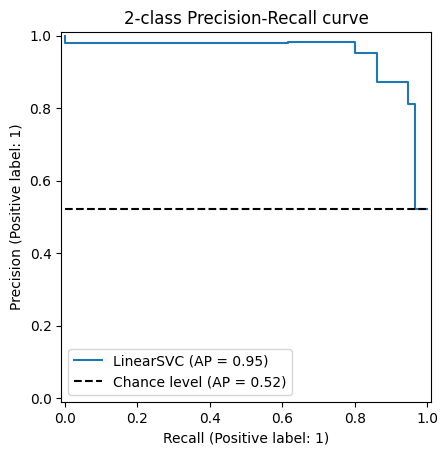

In [109]:
display = PrecisionRecallDisplay.from_estimator(
    predictor, test.drop(columns=["text","PHISH-GT"]), y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [110]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 200) 
tfidf_X = vectorizer.fit_transform(data["text"]).toarray()
print(vectorizer.get_feature_names_out())
# tell tfidf to ignore stop words potentially

['10' '2007' 'about' 'access' 'account' 'added' 'added no' 'address' 'all'
 'all rights' 'also' 'am' 'an' 'and' 'any' 'are' 'as' 'as in' 'at' 'bank'
 'banking' 'be' 'because' 'been' 'below' 'but' 'by' 'can' 'click'
 'click here' 'com' 'contact' 'customer' 'data' 'de' 'dear' 'details' 'do'
 'do not' 'don' 'email' 'error' 'example' 'file' 'for' 'for the' 'from'
 'from the' 'get' 'group' 'has' 'has been' 'have' 'he' 'help' 'here'
 'here to' 'how' 'html' 'http' 'http www' 'id' 'if' 'if you' 'important'
 'in' 'in submission' 'in the' 'information' 'is' 'it' 'it is' 'its'
 'jose' 'jose monkey' 'just' 'know' 'like' 'link' 'linux' 'list' 'mail'
 'mailbox' 'make' 'may' 'me' 'message' 'messages' 'monkey' 'monkey org'
 'more' 'my' 'name' 'need' 'new' 'no' 'no submission' 'not' 'notes'
 'notes same' 'now' 'number' 'of' 'of the' 'on' 'on the' 'on your' 'one'
 'online' 'only' 'or' 'org' 'other' 'our' 'out' 'page' 'password'
 'payment' 'please' 'privacy' 're' 'received' 'reply' 'request' 'reserved'
 

In [116]:
tfidf_X

array([[0.        , 0.        , 0.10165582, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1548107 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.45294127, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14854306, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.39733847, 0.        ,
        0.        ]])

In [112]:
tfidf_lr_model = skl.linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(tfidf_X, data["PHISH-GT"], test_size = 0.3, random_state = 0)
tfidf_lr_model.fit(X_train, y_train)
y_pred = tfidf_lr_model.predict(X_test)


words_only_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
print(words_only_matrix)

precision = skl.metrics.precision_score(y_test, y_pred)
recall = skl.metrics.recall_score(y_test, y_pred)

print("Accuracy:",skl.metrics.accuracy_score(y_test, y_pred))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, y_pred))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, y_pred))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[411  11]
 [ 10 438]]
Accuracy: 0.9758620689655172
Precision: 0.9755011135857461
Recall: 0.9776785714285714
F1 Score: 0.9765886287625418


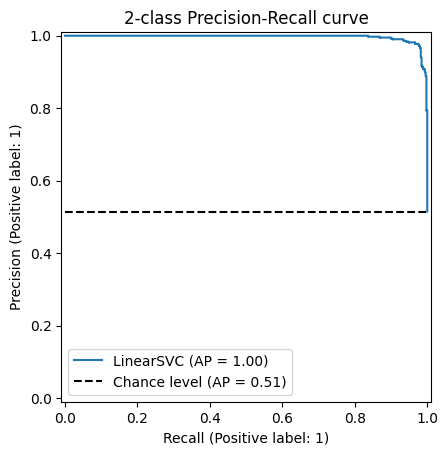

In [113]:
display = PrecisionRecallDisplay.from_estimator(
    tfidf_lr_model, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [114]:
y_pred = tfidf_lr_model.predict_proba(X_test)[:, 1]
y_pred = y_pred > 0.85

confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

precision = skl.metrics.precision_score(y_test, y_pred)
recall = skl.metrics.recall_score(y_test, y_pred)

print("Accuracy:",skl.metrics.accuracy_score(y_test, y_pred))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, y_pred))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, y_pred))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[422   0]
 [ 84 364]]
Accuracy: 0.903448275862069
Precision: 1.0
Recall: 0.8125
F1 Score: 0.896551724137931


In [123]:
noisy_labels = data.iloc[:, 3:]

In [127]:
tfidf_X_df = pd.DataFrame(tfidf_X)
tfidf_X_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.0,0.101656,0.0,0.000000,0.000000,0.0,0.000000,0.019506,0.000000,...,0.0,0.027742,0.051067,0.082387,0.086078,0.000000,0.025654,0.000000,0.000000,0.0
1,0.000000,0.0,0.154811,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.084495,0.233307,0.083645,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.101210,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.140105,0.0,0.000000,0.000000,0.0,0.408171,0.000000,0.000000,...,0.0,0.076469,0.000000,0.227098,0.000000,0.000000,0.000000,0.038688,0.000000,0.0
4,0.223771,0.0,0.000000,0.0,0.000000,0.153547,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.049282,0.000000,0.000000,0.000000,0.050374,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,0.115764,0.0,0.000000,0.0,0.078132,0.000000,0.0,0.000000,0.072434,0.111364,...,0.0,0.000000,0.000000,0.203962,0.000000,0.000000,0.095267,0.052120,0.088678,0.0
2893,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2894,0.000000,0.0,0.000000,0.0,0.113165,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.073854,0.000000,0.000000,0.000000,0.452941,0.000000,0.0
2895,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148543,0.000000,0.0


In [128]:
result = pd.merge(tfidf_X_df, noisy_labels, left_index=True, right_index=True)
result

,0,1,2,3,4,5,6,7,8,9,...,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
0,0.000000,0.0,0.101656,0.0,0.000000,0.000000,0.0,0.000000,0.019506,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.154811,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.140105,0.0,0.000000,0.000000,0.0,0.408171,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.223771,0.0,0.000000,0.0,0.000000,0.153547,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,0.115764,0.0,0.000000,0.0,0.078132,0.000000,0.0,0.000000,0.072434,0.111364,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2893,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2894,0.000000,0.0,0.000000,0.0,0.113165,0.000000,0.0,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2895,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [130]:
combined_model = skl.linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(result.to_numpy(), data["PHISH-GT"], test_size = 0.3, random_state = 0)
combined_model.fit(X_train, y_train)
y_pred = combined_model.predict(X_test)

combined_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
print(combined_matrix)

precision = skl.metrics.precision_score(y_test, y_pred)
recall = skl.metrics.recall_score(y_test, y_pred)

print("Accuracy:",skl.metrics.accuracy_score(y_test, y_pred))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, y_pred))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, y_pred))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[416   6]
 [ 12 436]]
Accuracy: 0.9793103448275862
Precision: 0.9864253393665159
Recall: 0.9732142857142857
F1 Score: 0.9797752808988764


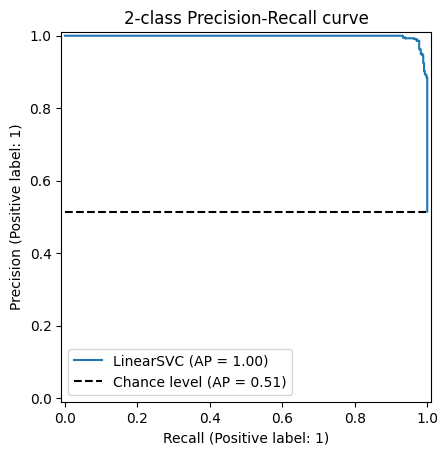

In [132]:
display = PrecisionRecallDisplay.from_estimator(
    combined_model, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [143]:
y_pred = combined_model.predict_proba(X_test)[:, 1]
y_pred = y_pred > 0.71

confusion_matrix = skl.metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

precision = skl.metrics.precision_score(y_test, y_pred)
recall = skl.metrics.recall_score(y_test, y_pred)

print("Accuracy:",skl.metrics.accuracy_score(y_test, y_pred))

"""
Measures the proportion of patients flagged as having heart disease that actually have heart disease.
(True positive / (true positive + false positive))
"""
print("Precision:",skl.metrics.precision_score(y_test, y_pred))

"""Recall: Measures the proportion of 
true positive marked heart disease / (true positive marked heart disease + false negative marked heart disease) 
that were correctly flagged as heart disease
"""
print("Recall:",skl.metrics.recall_score(y_test, y_pred))

print("F1 Score:", (2 * precision * recall) / (precision + recall))

[[422   0]
 [ 30 418]]
Accuracy: 0.9655172413793104
Precision: 1.0
Recall: 0.9330357142857143
F1 Score: 0.9653579676674364
